In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth', None)

In [2]:
sts_output = pd.read_excel("Benchmarking/results/STS/STS_benchmark_outputs.xlsx")

In [3]:
benchmark_models = ['cross-encoder-stsb-distilroberta-base','stsb-mpnet-base-v2']

In [4]:
high_sim = sts_output[sts_output['similarity_score']>=4]

In [9]:
CE_outlier = high_sim[high_sim['cross-encoder/stsb-distilroberta-base']<=0.80]

In [10]:
CE_outlier

,Unnamed: 0,sentence1,sentence2,similarity_score,cross-encoder/stsb-distilroberta-base,stsb-mpnet-base-v2,all-mpnet-base-v2,stsb-distilroberta-base-v2,all-distilroberta-v1
56,56,A man puts three pieces of meat into a pan.,A man is putting meat in a pan.,4.0,0.741115,0.846583,0.874553,0.827676,0.839500
67,67,A man is sitting and smoking.,A man is smoking a cigarette.,4.0,0.768838,0.872059,0.789443,0.811470,0.761599
96,96,A woman is slicing some tofu.,A woman is cutting a block of tofu into small cubes.,4.0,0.785159,0.796512,0.791061,0.860146,0.775611
97,97,Someone typed on a keyboard.,Someone is typing.,4.5,0.729945,0.843258,0.903108,0.863919,0.842310
113,113,A cheetah is running behind its prey.,A cheetah chases prey on across a field.,4.4,0.625098,0.834669,0.800229,0.699313,0.811530
...,...,...,...,...,...,...,...,...,...
1285,1285,Powerful quake strikes off eastern Indonesia,6.6-mag quake strikes off eastern Indonesia,4.0,0.691365,0.853225,0.925963,0.819276,0.835785
1310,1310,Greece suspends state broadcaster,Greece to close state broadcaster to save money,4.2,0.677023,0.710617,0.761896,0.765772,0.751336
1340,1340,Strong new quake hits shattered Pak region,6.8 quake in shattered Pakistan region,4.4,0.720120,0.625731,0.768246,0.622449,0.802284
1358,1358,More than 100 injured in Texas plant blast,Hundreds believed injured in Texas fertiliser plant blast,4.0,0.698493,0.663221,0.821538,0.843972,0.782371


In [15]:
mpnet_outlier = high_sim[high_sim['stsb-mpnet-base-v2']<=0.80].drop(columns = ['Unnamed: 0','cross-encoder/stsb-distilroberta-base','all-mpnet-base-v2','stsb-distilroberta-base-v2','all-distilroberta-v1'])

In [16]:
mpnet_outlier

,sentence1,sentence2,similarity_score,stsb-mpnet-base-v2
96,A woman is slicing some tofu.,A woman is cutting a block of tofu into small cubes.,4.0,0.796512
152,A man is riding a horse by a creek.,A man is riding a horse.,4.0,0.788367
217,A cat gets stuck on a moving ceiling fan.,A cat is swinging on a fan.,4.2,0.738242
278,Two Indian women with two Indian girls near the water.,Two Indian woman stand with two Indian girls on a beach.,4.0,0.712210
285,A brown duck and white duck stand on the grass.,Brown and white ducks walking on green grass.,4.2,0.770938
...,...,...,...,...
1299,Georgian PM's ally to become president - exit poll,Ally of Georgia's billionaire PM to be president -exit polls,4.6,0.795340
1310,Greece suspends state broadcaster,Greece to close state broadcaster to save money,4.2,0.710617
1340,Strong new quake hits shattered Pak region,6.8 quake in shattered Pakistan region,4.4,0.625731
1358,More than 100 injured in Texas plant blast,Hundreds believed injured in Texas fertiliser plant blast,4.0,0.663221


In [18]:
import seaborn as sns

<AxesSubplot:xlabel='similarity_score', ylabel='Count'>

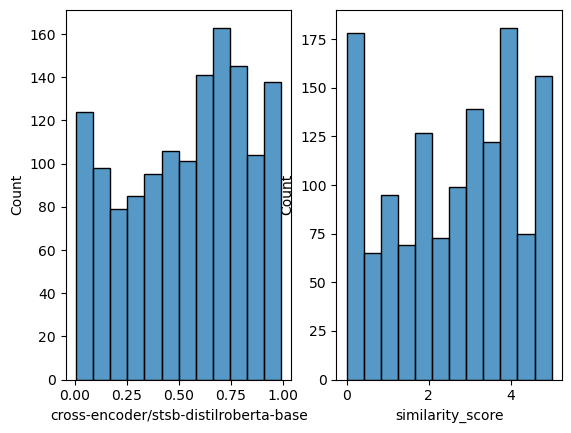

In [26]:
fig,axs = plt.subplots(1,2)
sns.histplot(data=sts_output, x='cross-encoder/stsb-distilroberta-base',ax=axs[0])
sns.histplot(data=sts_output, x='similarity_score',ax=axs[1])